# **LIBRARIES**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

In [4]:
tr_df = pd.read_csv('/content/drive/MyDrive/Datasets /Google_Stock_Price_Train.csv')
ts_df = pd.read_csv('/content/drive/MyDrive/Datasets /Google_Stock_Price_Test.csv')

# **EDA (Exploratory Data Analysis)**

In [5]:
print(tr_df.head())
print(tr_df.tail())

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
            Date    Open    High     Low   Close     Volume
1253  12/23/2016  790.90  792.74  787.28  789.91    623,400
1254  12/27/2016  790.68  797.86  787.66  791.55    789,100
1255  12/28/2016  793.70  794.23  783.20  785.05  1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79    744,300
1257  12/30/2016  782.75  782.78  770.41  771.82  1,770,000


In [6]:
print(ts_df.head())
print(ts_df.tail())

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
         Date    Open    High     Low   Close     Volume
15  1/25/2017  829.62  835.77  825.06  835.67  1,494,500
16  1/26/2017  837.81  838.00  827.01  832.15  2,973,900
17  1/27/2017  834.71  841.95  820.44  823.31  2,965,800
18  1/30/2017  814.66  815.84  799.80  802.32  3,246,600
19  1/31/2017  796.86  801.25  790.52  796.79  2,160,600


In [7]:
print(tr_df.describe())
print(ts_df.describe())

              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000
             Open        High         Low       Close
count   20.000000   20.000000   20.000000   20.000000
mean   807.526000  811.926500  801.949500  807.904500
std     15.125428   14.381198   13.278607   13.210088
min    778.810000  789.630000  775.800000  786.140000
25%    802.965000  806.735000  797.427500  802.282500
50%    806.995000  808.640000  801.530000  806.110000
75%    809.560000  817.097500  804.477500  810.760000
max    837.810000  841.950000  827.010000  835.670000


# **FE (Feature Engineering)**

In [8]:
#copy of existing df

tr_df_copy = tr_df.copy()
ts_df_copy = ts_df.copy()

In [9]:
#cleaning the data (Date & Volume features)

tr_df_copy['Date']=pd.to_datetime(tr_df_copy['Date'])
tr_df_copy.set_index('Date',drop=True,inplace=True)
tr_df_copy['Volume'] = tr_df_copy['Volume'].str.replace(',', '').astype(float)
tr_df_copy['Close'] = tr_df_copy['Close'].str.replace(',', '').astype(float)

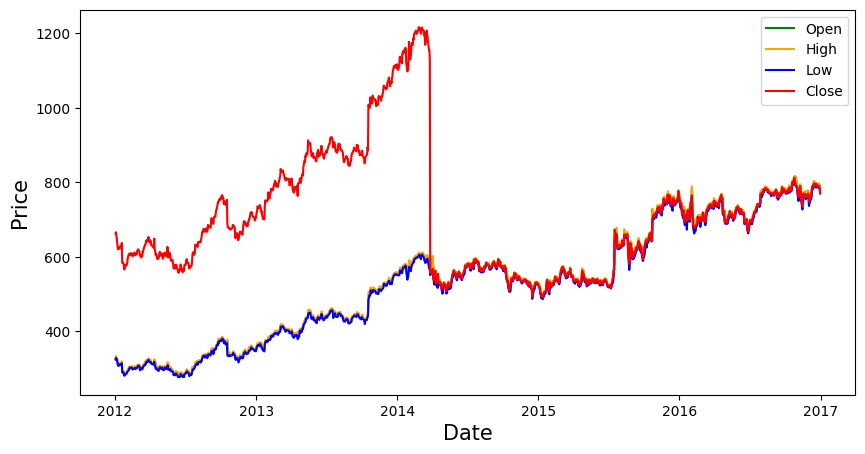

In [10]:
#graphical representation of open, high, low and close (Date vs. Price)


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(tr_df_copy['Open'], label='Open', color='green')
ax.plot(tr_df_copy['High'], label='High', color='orange')
ax.plot(tr_df_copy['Low'],label='Low',color='blue')
ax.plot(tr_df_copy['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()
fig.show()

In [11]:
#rearranging the line downwards which is so upward

tr_df_copy['Close'] = tr_df_copy.apply(lambda x: x['Close']/2 if x['Close'] > x['High'] else x['Close'], axis=1)


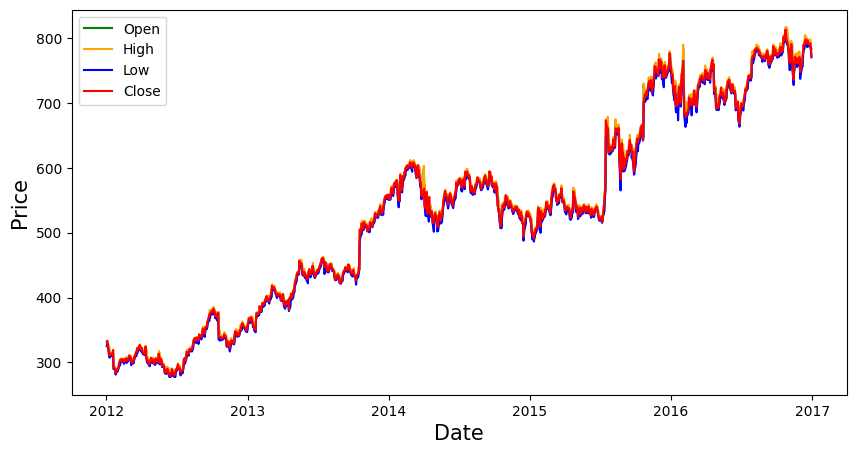

In [12]:
#graphical representation of open, high, low and close (Date vs. Price) after re arrangement

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(tr_df_copy['Open'], label='Open', color='green')
ax.plot(tr_df_copy['High'], label='High', color='orange')
ax.plot(tr_df_copy['Low'],label='Low',color='blue')
ax.plot(tr_df_copy['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()
fig.show()

# **FS (Feature Selection)**

In [13]:
#removing all the features except Close

predictors = ['Close']
tr_df_copy = tr_df_copy[predictors]

In [14]:
#transforming single time series dataset into multiple smaller sequences along with their respective labels

def create_seq(ds):
    seq = []
    labels = []
    for i in range(len(ds) - 10):
        seq.append(ds[i:i+10])
        labels.append(ds[i+10])
    return np.array(seq), np.array(labels)

# **DP (Data Preprocessing)**

In [15]:
#scaling the data i.e; (0-1)

scaler = StandardScaler()
tr_df_copy[tr_df_copy.columns] = scaler.fit_transform(tr_df_copy)

# **Model Selection, Training & Deployment**



In [16]:
#spliting the data and converting it into numpy array

df_split = np.split(tr_df_copy, [int(.7*len(tr_df_copy)), int(.85*len(tr_df_copy))]) #splitting into train and valid


tr_x_RNN, val_x_RNN, ts_x_RNN = [d[predictors].to_numpy() for d in df_split] #numpy array


tr_seq_RNN, tr_lbl_RNN = create_seq(tr_x_RNN)
val_seq_RNN, val_lbl_RNN = create_seq(val_x_RNN)
ts_seq_RNN, ts_lbl_RNN = create_seq(ts_x_RNN)
tr_seq_RNN.shape, tr_lbl_RNN.shape, val_seq_RNN.shape, val_lbl_RNN.shape, ts_seq_RNN.shape, ts_lbl_RNN.shape

((870, 10, 1), (870, 1), (179, 10, 1), (179, 1), (179, 10, 1), (179, 1))

In [17]:
#Simple RNN model

model1 = Sequential()
model1.add(SimpleRNN(20, input_shape = (tr_seq_RNN.shape[1], tr_seq_RNN.shape[2])))

model1.add(Dropout(0.1))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#history of Simple RNN model

history1 = model1.fit(tr_seq_RNN, tr_lbl_RNN, epochs=50,validation_data=(val_seq_RNN, val_lbl_RNN), verbose=1)

Epoch 1/50
28/28 [==============================] - 2s 15ms/step - loss: 0.1581 - mean_absolute_error: 0.2873 - val_loss: 0.0350 - val_mean_absolute_error: 0.1563
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0459 - mean_absolute_error: 0.1527 - val_loss: 0.0263 - val_mean_absolute_error: 0.1411
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_absolute_error: 0.1357 - val_loss: 0.0381 - val_mean_absolute_error: 0.1731
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0367 - mean_absolute_error: 0.1340 - val_loss: 0.0271 - val_mean_absolute_error: 0.1436
Epoch 5/50
28/28 [==============================] - 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.1213 - val_loss: 0.0218 - val_mean_absolute_error: 0.1273
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.1142 - val_loss: 0.0216 - val_mean_absolute_error: 0.1264
Epoch 7/50
28/28 [=========

In [19]:
##spliting the data and converting it into numpy array

scaler1 = MinMaxScaler()
tr_df_copy[tr_df_copy.columns] = scaler1.fit_transform(tr_df_copy)


data_split = np.split(tr_df_copy, [int(.7*len(tr_df_copy)), int(.85*len(tr_df_copy))])  #splitting into train and val


tr_x_GRU, val_x_GRU, ts_x_GRU = [d[predictors].to_numpy() for d in data_split] #numpy array


tr_seq_GRU, tr_lbl_GRU = create_seq(tr_x_GRU)
val_seq_GRU, val_lbl_GRU = create_seq(val_x_GRU)
ts_seq_GRU, ts_lbl_GRU = create_seq(ts_x_GRU)
tr_seq_GRU.shape, tr_lbl_GRU.shape, val_seq_GRU.shape, val_lbl_GRU.shape, ts_seq_GRU.shape, ts_lbl_GRU.shape

((870, 10, 1), (870, 1), (179, 10, 1), (179, 1), (179, 10, 1), (179, 1))

In [20]:
#GRU model

model2 = Sequential()

model2.add(GRU(30, activation = "tanh",
                   recurrent_activation = "sigmoid",
                   input_shape=(tr_seq_GRU.shape[1], tr_seq_GRU.shape[2])))

model2.add(Dropout(rate=0.1))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30)                2970      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3001 (11.72 KB)
Trainable params: 3001 (11.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#history of GRU model

history2 = model2.fit(tr_seq_GRU, tr_lbl_GRU, epochs=50,validation_data=(val_seq_GRU, val_lbl_GRU), verbose=1)

Epoch 1/50
28/28 [==============================] - 3s 26ms/step - loss: 0.0676 - mean_absolute_error: 0.2002 - val_loss: 0.0253 - val_mean_absolute_error: 0.1477
Epoch 2/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0995 - val_loss: 0.0450 - val_mean_absolute_error: 0.2052
Epoch 3/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0668 - val_loss: 0.0126 - val_mean_absolute_error: 0.1051
Epoch 4/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0029 - mean_absolute_error: 0.0431 - val_loss: 0.0029 - val_mean_absolute_error: 0.0447
Epoch 5/50
28/28 [==============================] - 0s 8ms/step - loss: 0.0019 - mean_absolute_error: 0.0327 - val_loss: 0.0021 - val_mean_absolute_error: 0.0355
Epoch 6/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0019 - mean_absolute_error: 0.0308 - val_loss: 0.0016 - val_mean_absolute_error: 0.0285
Epoch 7/50
28/28 [========

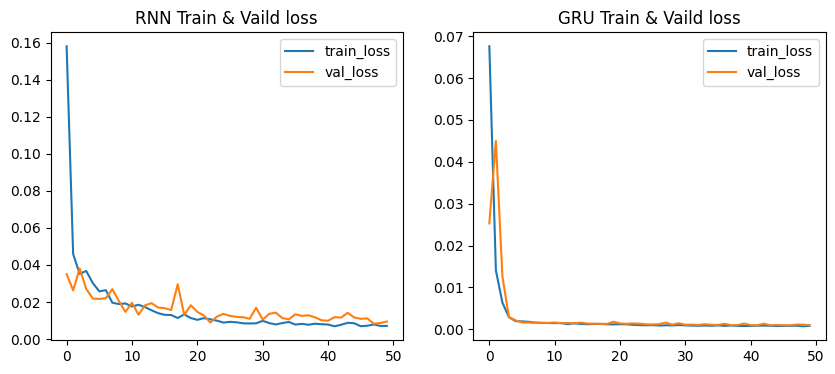

In [22]:
#plot of train and valid loss of simple rnn and gru


fg, ax =plt.subplots(1,2,figsize=(10,4))


ax[0].plot(history1.history['loss'], label='train_loss')
ax[0].plot(history1.history['val_loss'], label='val_loss')
ax[0].set_title('RNN Train & Vaild loss')
ax[0].legend()


ax[1].plot(history2.history['loss'], label='train_loss')
ax[1].plot(history2.history['val_loss'], label='val_loss')
ax[1].set_title('GRU Train & Vaild loss')
ax[1].legend()


fg.show()

In [23]:
#prediction for simple rnn model

ts_pred_RNN = model1.predict(ts_seq_RNN)
ts_inv_lbl_RNN = scaler.inverse_transform(ts_lbl_RNN)
ts_inv_pred_RNN = scaler.inverse_transform(ts_pred_RNN)

6/6 [==============================] - 0s 3ms/step


In [24]:
#prediction for gru model

ts_inv_lbl_GRU = scaler1.inverse_transform(ts_lbl_GRU)
ts_pred_GRU = model2.predict(ts_seq_GRU)
ts_inv_pred_GRU = scaler1.inverse_transform(ts_pred_GRU)

6/6 [==============================] - 0s 4ms/step


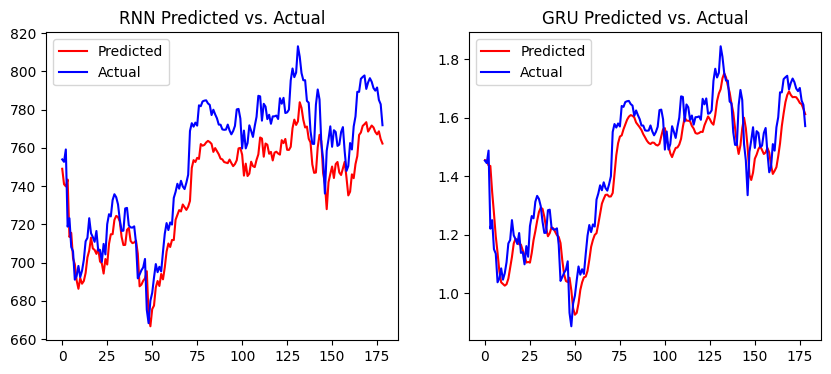

In [25]:
#plot for actual and predicted values
#for both simple rnn and gru

fg, ax =plt.subplots(1,2,figsize=(10,4))


ax[0].plot(ts_inv_pred_RNN, label='Predicted', color='red')
ax[0].plot(ts_inv_lbl_RNN, label='Actual', color='blue')
ax[0].set_title('RNN Predicted vs. Actual')
ax[0].legend()


ax[1].plot(ts_inv_pred_GRU, label='Predicted', color='red')
ax[1].plot(ts_inv_lbl_GRU, label='Actual', color='blue')
ax[1].set_title('GRU Predicted vs. Actual')
ax[1].legend()


fg.show()

In [26]:
##spliting the data and converting it into numpy array


tr_x_LSTM, val_x_LSTM, ts_x_LSTM = [d[predictors].to_numpy() for d in data_split] #numpy array
tr_seq_LSTM, tr_lbl_LSTM = create_seq(tr_x_LSTM)
val_seq_LSTM, val_lbl_LSTM = create_seq(val_x_LSTM)
ts_seq_LSTM, ts_lbl_LSTM = create_seq(ts_x_LSTM)
tr_seq_LSTM.shape, tr_lbl_LSTM.shape, val_seq_LSTM.shape, val_lbl_LSTM.shape, ts_seq_LSTM.shape, ts_lbl_LSTM.shape

((870, 10, 1), (870, 1), (179, 10, 1), (179, 1), (179, 10, 1), (179, 1))

In [27]:
#LSTM model

model3 = Sequential()

model3.add(LSTM(30, activation = "tanh",
                   recurrent_activation = "sigmoid",
                   input_shape=(tr_seq_LSTM.shape[1], tr_seq_LSTM.shape[2])))

model3.add(Dropout(rate=0.1))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#history of LSTM model

history3 = model3.fit(tr_seq_LSTM, tr_lbl_LSTM, epochs=50,validation_data=(val_seq_LSTM, val_lbl_LSTM), verbose=1)

Epoch 1/50
28/28 [==============================] - 3s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.1973 - val_loss: 0.0099 - val_mean_absolute_error: 0.0880
Epoch 2/50
28/28 [==============================] - 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0759 - val_loss: 0.0297 - val_mean_absolute_error: 0.1651
Epoch 3/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0541 - val_loss: 0.0067 - val_mean_absolute_error: 0.0720
Epoch 4/50
28/28 [==============================] - 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0392 - val_loss: 0.0025 - val_mean_absolute_error: 0.0358
Epoch 5/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0348 - val_loss: 0.0036 - val_mean_absolute_error: 0.0458
Epoch 6/50
28/28 [==============================] - 0s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0336 - val_loss: 0.0027 - val_mean_absolute_error: 0.0376
Epoch 7/50
28/28 [========

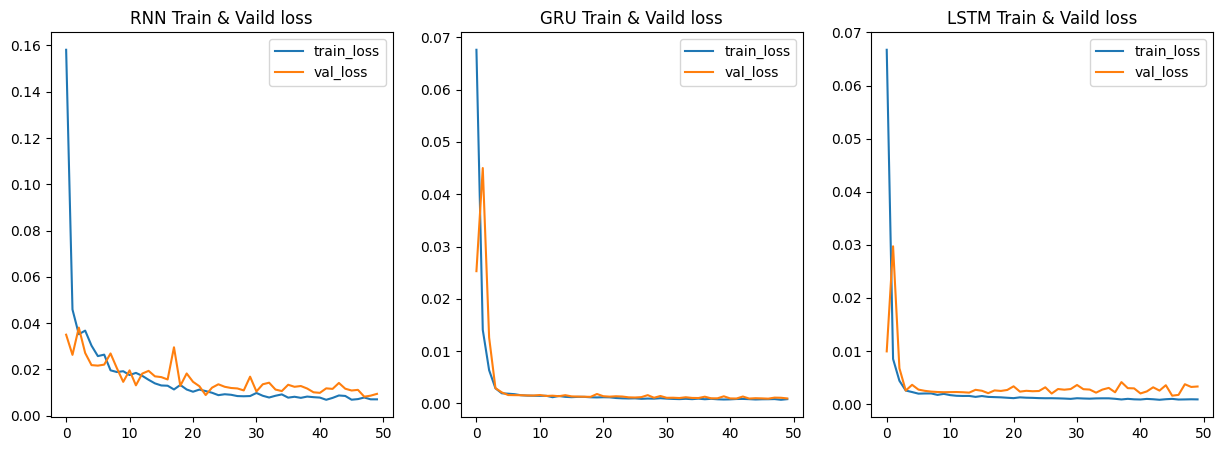

In [29]:
#plot of train and valid loss of simple rnn, gru and lstm

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].plot(history1.history['loss'], label='train_loss')
ax[0].plot(history1.history['val_loss'], label='val_loss')
ax[0].set_title('RNN Train & Vaild loss')
ax[0].legend()


ax[1].plot(history2.history['loss'], label='train_loss')
ax[1].plot(history2.history['val_loss'], label='val_loss')
ax[1].set_title('GRU Train & Vaild loss')
ax[1].legend()


ax[2].plot(history3.history['loss'], label='train_loss')
ax[2].plot(history3.history['val_loss'], label='val_loss')
ax[2].set_title('LSTM Train & Vaild loss')
ax[2].legend()

fg.show()

In [30]:
#prediction for lstm model

ts_inv_lbl_LSTM = scaler1.inverse_transform(ts_lbl_LSTM)
ts_pred_LSTM = model3.predict(ts_seq_LSTM)
ts_inv_pred_LSTM = scaler1.inverse_transform(ts_pred_LSTM)

6/6 [==============================] - 1s 4ms/step


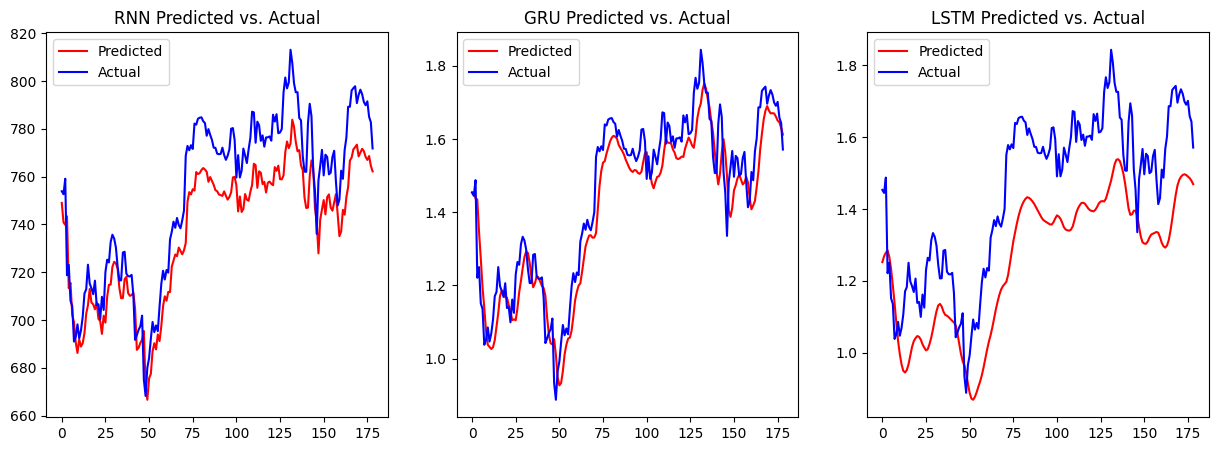

In [31]:
#plot for actual and predicted values
#for all the models

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


ax[0].plot(ts_inv_pred_RNN, label='Predicted', color='red')
ax[0].plot(ts_inv_lbl_RNN, label='Actual', color='blue')
ax[0].set_title('RNN Predicted vs. Actual')
ax[0].legend()


ax[1].plot(ts_inv_pred_GRU, label='Predicted', color='red')
ax[1].plot(ts_inv_lbl_GRU, label='Actual', color='blue')
ax[1].set_title('GRU Predicted vs. Actual')
ax[1].legend()


ax[2].plot(ts_inv_pred_LSTM, label='Predicted', color='red')
ax[2].plot(ts_inv_lbl_LSTM, label='Actual', color='blue')
ax[2].set_title('LSTM Predicted vs. Actual')
ax[2].legend()

fg.show()

# **Conclusion**

*As we can see that LSTM is performing best amongst other two models (i.e; Simple RNN and GRU). So we can say that it requires long term memory for predicting. If you want more near to perfect accuracy you can evaluate the LSTM model. Play with parameters like activation, optimizations etcetra.*



In summary,
> Simple RNN < GRU < LSTM

